# Plot parallel image downsizing results

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Posix results

In [10]:
results_df = pd.read_csv('results.csv')
results_df

,time,threads,image_name,algorithm,speedup
0,0.017985,1,./image1_4k.jpg,Nearest,1.000000
1,0.014378,2,./image1_4k.jpg,Nearest,1.250869
2,0.012927,4,./image1_4k.jpg,Nearest,1.391274
3,0.013223,8,./image1_4k.jpg,Nearest,1.360130
4,0.012261,16,./image1_4k.jpg,Nearest,1.466846
5,0.017048,1,./image2_1080p.jpg,Nearest,1.000000
6,0.013257,2,./image2_1080p.jpg,Nearest,1.285962
7,0.012619,4,./image2_1080p.jpg,Nearest,1.350979
8,0.013418,8,./image2_1080p.jpg,Nearest,1.270532
9,0.013660,16,./image2_1080p.jpg,Nearest,1.248023


In [11]:
groups = results_df.groupby(['image_name', 'algorithm']).indices
groups

{('./image1_4k.jpg', 'Bilinear'): array([15, 16, 17, 18, 19]),
 ('./image1_4k.jpg', 'Nearest'): array([0, 1, 2, 3, 4]),
 ('./image2_1080p.jpg', 'Bilinear'): array([20, 21, 22, 23, 24]),
 ('./image2_1080p.jpg', 'Nearest'): array([5, 6, 7, 8, 9]),
 ('./image3_720p.jpg', 'Bilinear'): array([25, 26, 27, 28, 29]),
 ('./image3_720p.jpg', 'Nearest'): array([10, 11, 12, 13, 14])}

### Plot POSIX

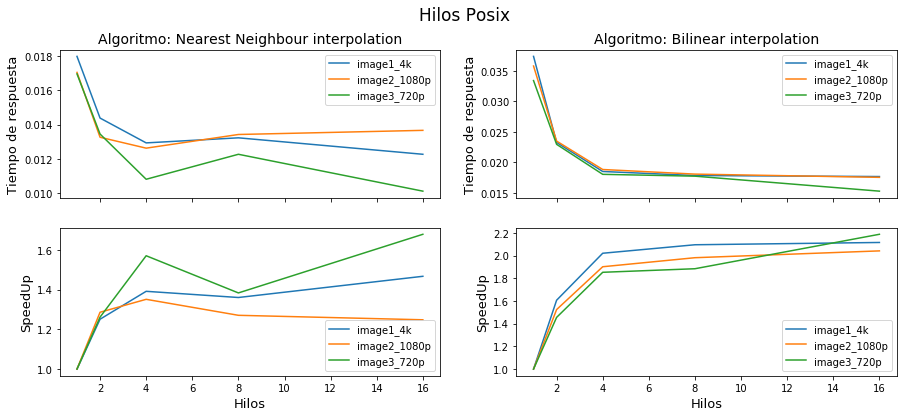

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(15, 6))
colors = []

for keys, values in groups.items():
    data = results_df.loc[values][['threads', 'time', 'speedup']]
    if keys[1] == 'Nearest':
        ax1.plot(data['threads'], data['time'], label=keys[0].split('.')[1][1:])
        ax3.plot(data['threads'], data['speedup'], label=keys[0].split('.')[1][1:])
    else:
        ax2.plot(data['threads'], data['time'], label=keys[0].split('.')[1][1:])
        ax4.plot(data['threads'], data['speedup'], label=keys[0].split('.')[1][1:])

ax1.set_ylabel('Tiempo de respuesta', fontsize=13)
# ax1.set_xlabel('Hilos', fontsize=13)
ax1.set_title('Algoritmo: Nearest Neighbour interpolation', fontsize=14)
ax1.legend()

ax2.set_ylabel('Tiempo de respuesta', fontsize=13)
# ax2.set_xlabel('Hilos', fontsize=13)
ax2.set_title('Algoritmo: Bilinear interpolation', fontsize=14)
ax2.legend()

ax3.set_ylabel('SpeedUp', fontsize=13)
ax3.set_xlabel('Hilos', fontsize=13)
# ax3.set_title('Algoritmo: Nearest Neighbour interpolation', fontsize=13)
ax3.legend()

ax4.set_ylabel('SpeedUp', fontsize=13)
ax4.set_xlabel('Hilos', fontsize=13)
# ax4.set_title('Algoritmo: Bilinear interpolation', fontsize=13)
ax4.legend()

fig.suptitle('Hilos Posix', fontsize=17)

fig.savefig('Posix_results_plots.pdf', dpi=400)

## OpenMP results

In [13]:
results_df = pd.read_csv('results_openmp.csv')
results_df

,time,threads,image_name,algorithm,speedup
0,0.021286,1,./image1_4k.jpg,Nearest,1.000000
1,0.015802,2,./image1_4k.jpg,Nearest,1.250869
2,0.026596,4,./image1_4k.jpg,Nearest,1.391274
3,0.015649,8,./image1_4k.jpg,Nearest,1.360130
4,0.013346,16,./image1_4k.jpg,Nearest,1.466846
5,0.020416,1,./image2_1080p.jpg,Nearest,1.000000
6,0.016887,2,./image2_1080p.jpg,Nearest,1.285962
7,0.015452,4,./image2_1080p.jpg,Nearest,1.350979
8,0.017471,8,./image2_1080p.jpg,Nearest,1.270532
9,0.014666,16,./image2_1080p.jpg,Nearest,1.248023


In [14]:
groups = results_df.groupby(['image_name', 'algorithm']).indices
groups

{('./image1_4k.jpg', 'Bilinear'): array([15, 16, 17, 18, 19]),
 ('./image1_4k.jpg', 'Nearest'): array([0, 1, 2, 3, 4]),
 ('./image2_1080p.jpg', 'Bilinear'): array([20, 21, 22, 23, 24]),
 ('./image2_1080p.jpg', 'Nearest'): array([5, 6, 7, 8, 9]),
 ('./image3_720p.jpg', 'Bilinear'): array([25, 26, 27, 28, 29]),
 ('./image3_720p.jpg', 'Nearest'): array([10, 11, 12, 13, 14])}

### Plot POSIX

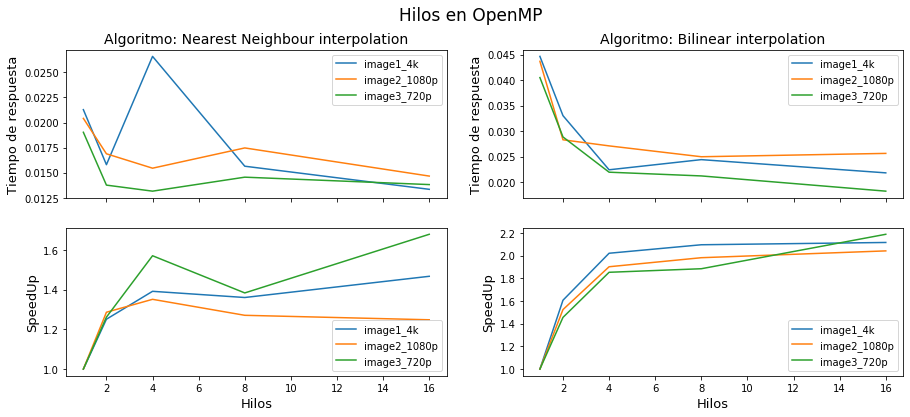

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(15, 6))
colors = []

for keys, values in groups.items():
    data = results_df.loc[values][['threads', 'time', 'speedup']]
    if keys[1] == 'Nearest':
        ax1.plot(data['threads'], data['time'], label=keys[0].split('.')[1][1:])
        ax3.plot(data['threads'], data['speedup'], label=keys[0].split('.')[1][1:])
    else:
        ax2.plot(data['threads'], data['time'], label=keys[0].split('.')[1][1:])
        ax4.plot(data['threads'], data['speedup'], label=keys[0].split('.')[1][1:])

ax1.set_ylabel('Tiempo de respuesta', fontsize=13)
# ax1.set_xlabel('Hilos', fontsize=13)
ax1.set_title('Algoritmo: Nearest Neighbour interpolation', fontsize=14)
ax1.legend()

ax2.set_ylabel('Tiempo de respuesta', fontsize=13)
# ax2.set_xlabel('Hilos', fontsize=13)
ax2.set_title('Algoritmo: Bilinear interpolation', fontsize=14)
ax2.legend()

ax3.set_ylabel('SpeedUp', fontsize=13)
ax3.set_xlabel('Hilos', fontsize=13)
# ax3.set_title('Algoritmo: Nearest Neighbour interpolation', fontsize=13)
ax3.legend()

ax4.set_ylabel('SpeedUp', fontsize=13)
ax4.set_xlabel('Hilos', fontsize=13)
# ax4.set_title('Algoritmo: Bilinear interpolation', fontsize=13)
ax4.legend()

fig.suptitle('Hilos en OpenMP', fontsize=17)

fig.savefig('Openmp_results_plots.pdf', dpi=400)

In [ ]:
results_df = pd.read_csv('results.csv')
results_df

groups = results_df.groupby(['image_name', 'algorithm']).indices
groups

## Plot POSIX

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(15, 6))
colors = []

for keys, values in groups.items():
    data = results_df.loc[values][['threads', 'time', 'speedup']]
    if keys[1] == 'Nearest':
        ax1.plot(data['threads'], data['time'], label=keys[0].split('.')[1][1:])
        ax3.plot(data['threads'], data['speedup'], label=keys[0].split('.')[1][1:])
    else:
        ax2.plot(data['threads'], data['time'], label=keys[0].split('.')[1][1:])
        ax4.plot(data['threads'], data['speedup'], label=keys[0].split('.')[1][1:])

ax1.set_ylabel('Tiempo de respuesta', fontsize=13)
# ax1.set_xlabel('Hilos', fontsize=13)
ax1.set_title('Algoritmo: Nearest Neighbour interpolation', fontsize=14)
ax1.legend()

ax2.set_ylabel('Tiempo de respuesta', fontsize=13)
# ax2.set_xlabel('Hilos', fontsize=13)
ax2.set_title('Algoritmo: Bilinear interpolation', fontsize=14)
ax2.legend()

ax3.set_ylabel('SpeedUp', fontsize=13)
ax3.set_xlabel('Hilos', fontsize=13)
# ax3.set_title('Algoritmo: Nearest Neighbour interpolation', fontsize=13)
ax3.legend()

ax4.set_ylabel('SpeedUp', fontsize=13)
ax4.set_xlabel('Hilos', fontsize=13)
# ax4.set_title('Algoritmo: Bilinear interpolation', fontsize=13)
ax4.legend()

fig.suptitle('Hilos Posix', fontsize=17)

fig.savefig('Posix_results_plots.png', dpi=400)